Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?
ref. https://en.wikipedia.org/wiki/Monty_Hall_problem

In [1]:
import random
import pandas as pd

<AxesSubplot:>

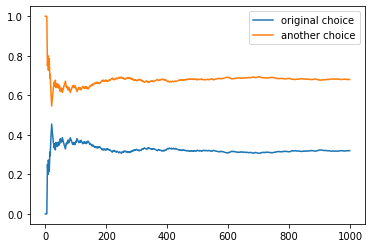

In [3]:
doors = [0, 1, 2]

N = 1000

atari_counter_sonomama, atari_counter_monty, total_counter = 0, 0, 0
sonomama_seikai, monty_seikai = [], []

total_count = []
for _ in range(N):
    # Setting of doors
    door_hit = random.choice(doors)                               ## Hit!    :)
    doors_hazure = [door for door in doors if door != door_hit]  ## Not hit :(

    ## Select a door in random
    door_chosen = random.choice(doors)

    ## Advisory of "Not hit" door
    teach_hazure = random.choice([door for door in doors_hazure if door != door_chosen])
    
    ## Select another door from "not hit" & remaining doors
    another_door = random.choice([door for door in doors if (door != teach_hazure) and (door != door_chosen)])
    
    # Summary
    total_counter += 1
    ## Judge correctness
    if door_chosen == door_hit: ## Hit with original door
        atari_counter_sonomama += 1
    if another_door == door_hit:  ## Hit after selecting another door
        atari_counter_monty += 1

    total_count.append([atari_counter_sonomama / total_counter, atari_counter_monty / total_counter])

pd.DataFrame(total_count, columns=['original choice', 'another choice']).plot()